In [78]:
# This code solves the two-dimensional (2-D) acoustic wave equation using the finite difference method

# The 2-D acoustic wave equation is defined as: d2U/dt2 = 1/v/v * (d2U/dx2 + d2U/dz2) + S(t,x0, z0)
# where U is the wavefield, v is velocity of the model, t is time, x and z are lateral and vertical distances,
# and S(x0,z0) is the source signature at location (x0,z0), which is this modelling is Ricker wavelet

# The finite difference discretization of the 2-D acoustic wave equation is as follows:
# (U(t2,x1)-2U(t1,x1)+u(t0,x1)) / (dt*dt) = 1/v/v * (U(t1,x2,z1)-2*U(t1,x1,z1)+U(t1,x0,z1)) / (dx*dx)...
#                                         + 1/v/v * (U(t1,x1,z2)-2*U(t1,x1,z1)+U(t1,x1,z0)) / (dz*dz) + S(t1,x0,z0)
# In this modelling, I assume the velocity is homogeneous, which means v is a constant value

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [88]:
X = 4000 # The lateral size of the 2-D model, unit: meter
Z = 4000 # The vertical size of the 2-D model, unit: meter
v = 3000  # The acoustic velocity of the 2-D model, unit: meter/second
T = 0.5    # The maximum modelling time
dx = 20.0  # Grid spacing for discretize the 2-D model, unit: meter
dz = 20.0  # Grid spacing for discretize the 2-D model, unit: meter
dt = 0.002 # Time step for modelling, unit: second
fm = 10.0  # M33 sain frequency of the Ricker wavelet
Xs = X/2   # Lateral location of source wavelt
Zs = Z/2   # Vertiocal location of source wavelt

In [89]:
Nx = int(X//dx)
Nz = int(Z//dz)
Nt = int(T//dt)+1
print("The model is laterally discretized in", Nx, "grids")
print("The model is vertically discretized in", Nz, "grids")
print("The total modelling time step is", Nt)

The model is laterally discretized in 200 grids
The model is vertically discretized in 200 grids
The total modelling time step is 250


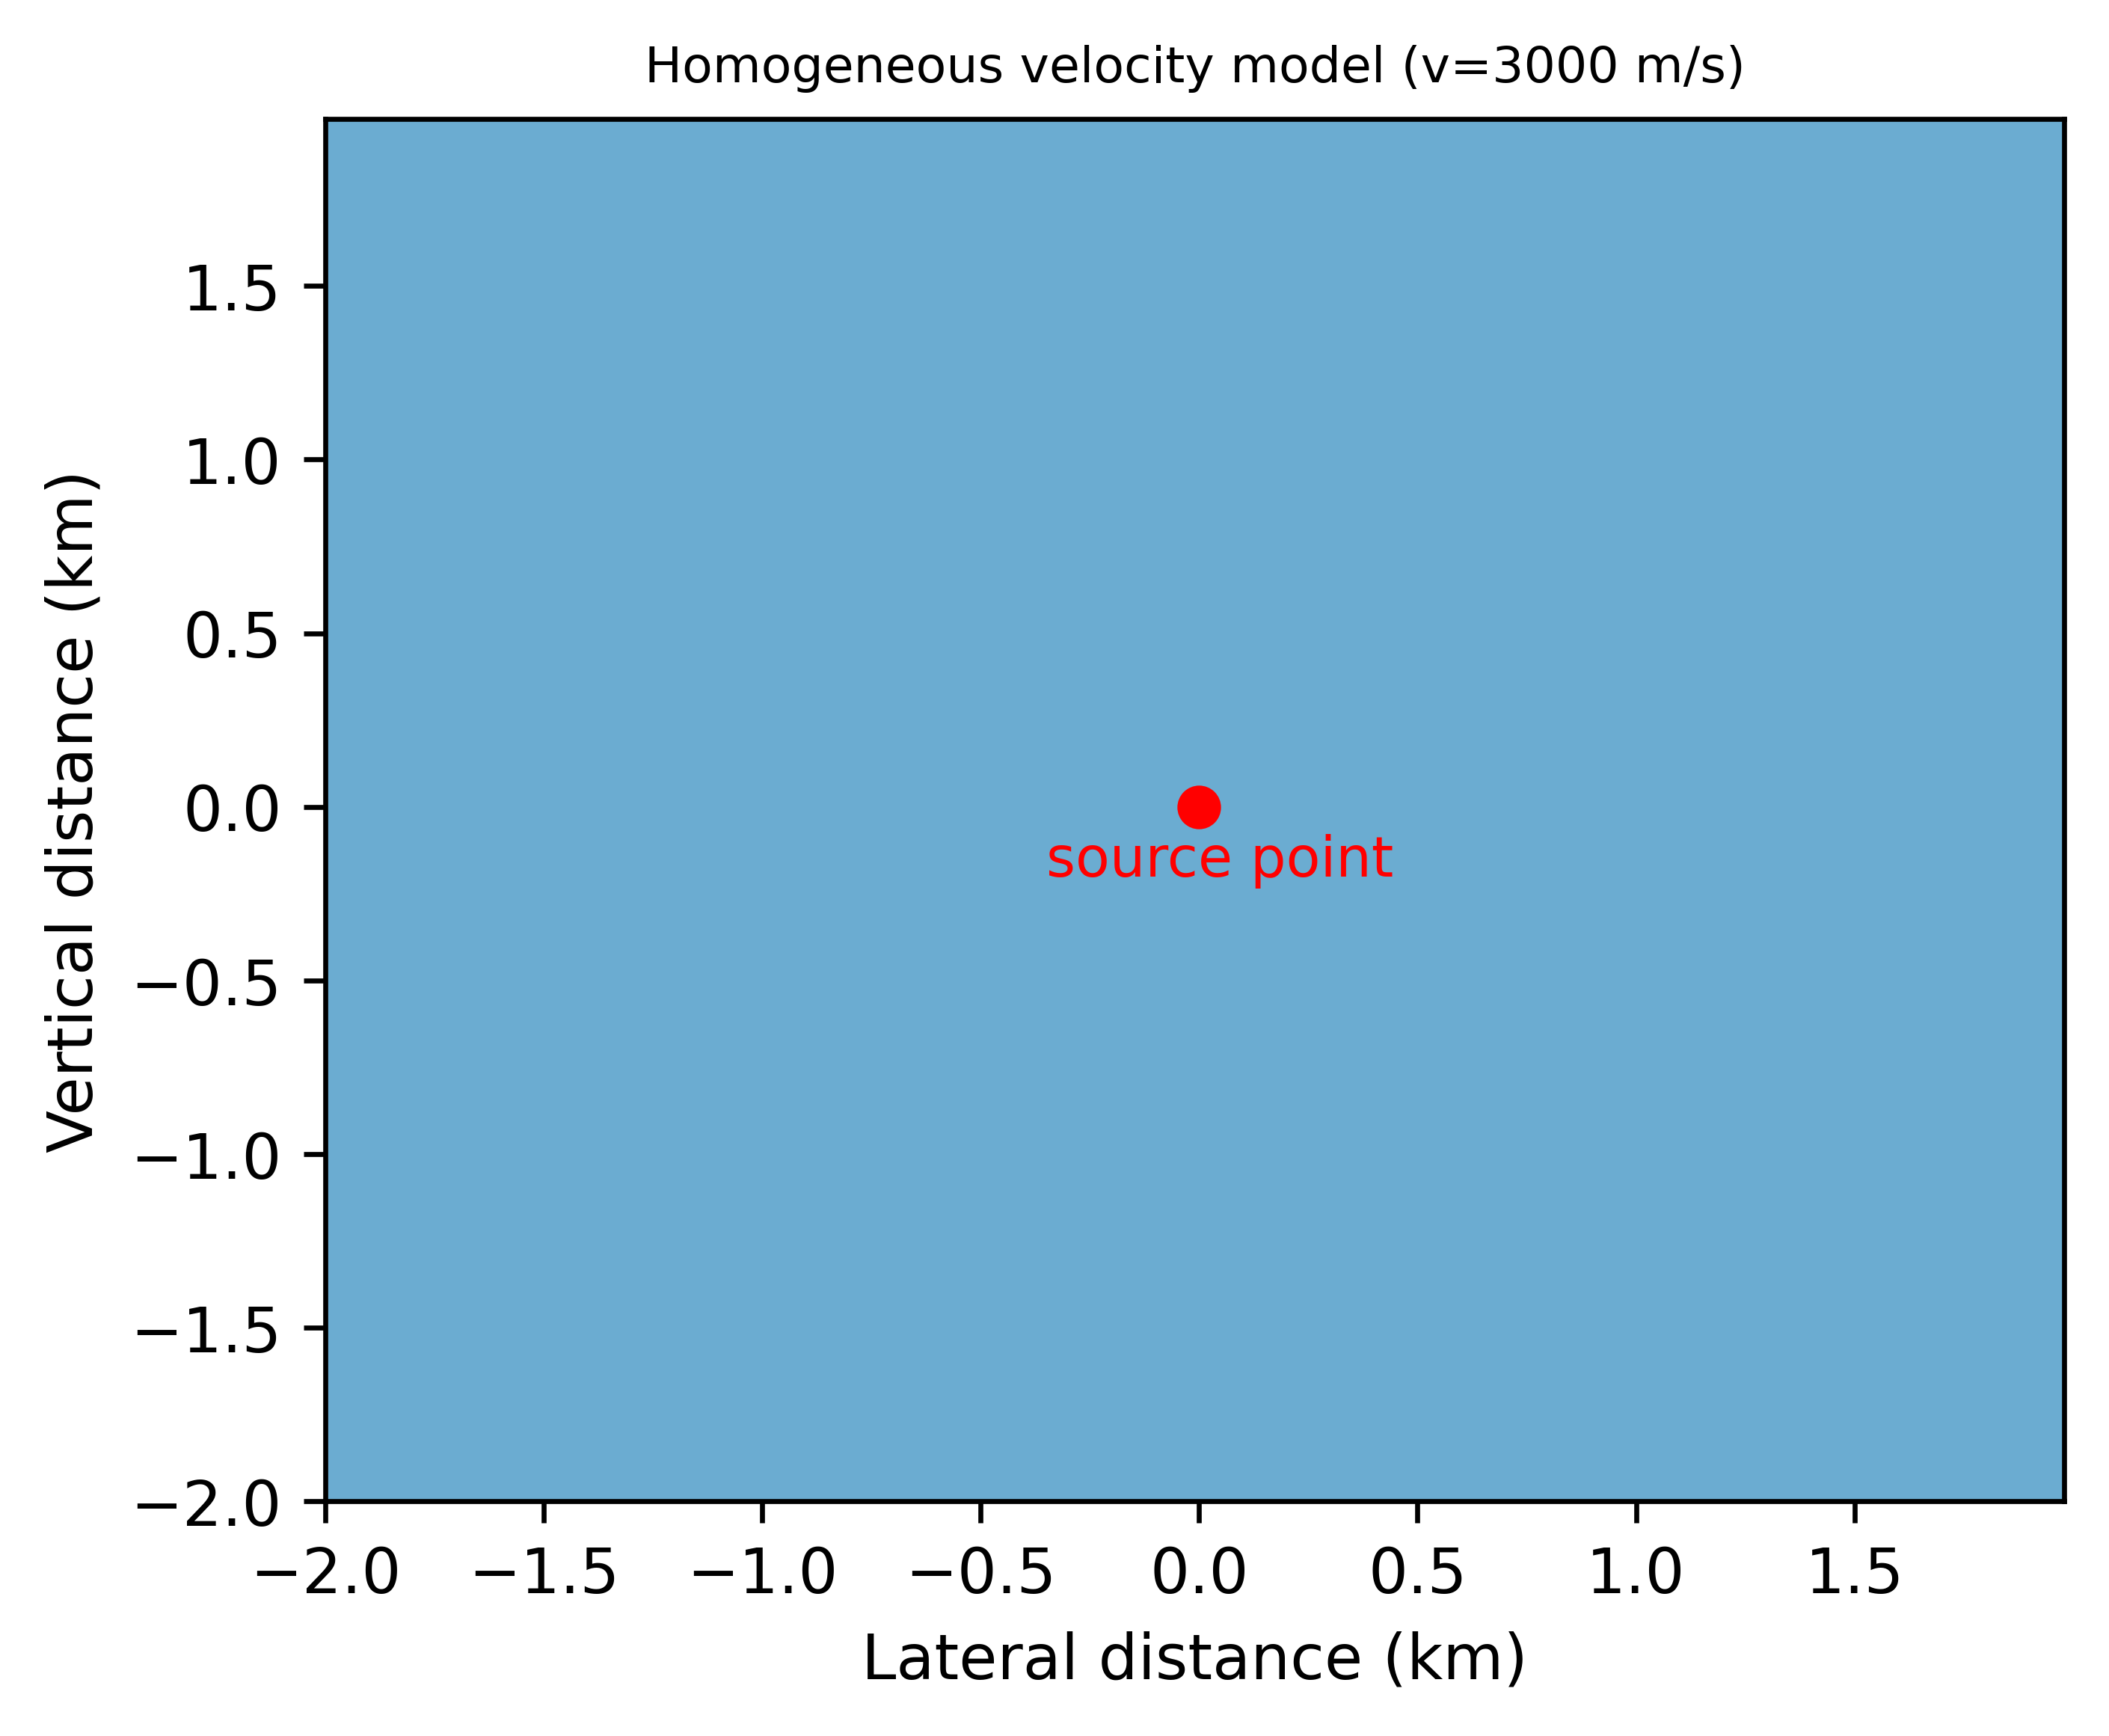

In [120]:
Vmodel = np.zeros((Nz,Nx), dtype=float)  
Vmodel = Vmodel + v

# Plot the waveform
plt.figure(num=1,figsize=(5,4),dpi=600)
cntr2 = plt.contourf(z/1000,x/1000,Vmodel,cmap='RdBu_r')
plt.plot(Xs/1000-X/1000/2,Zs/1000-Z/1000/2, 'o', color='r', alpha=1)
plt.text(Xs/1000-X/1000/2-0.35,Zs/1000-Z/1000/2-0.2, 'source point', fontsize=9, color='red')
#plt.xlim(-1*X/2/1000,X/2/1000)
#plt.ylim(-1*Z/2/1000,Z/2/1000)
plt.xlabel('Lateral distance (km)')
plt.ylabel('Vertical distance (km)')
ax=plt.gca()
title='Homogeneous velocity model (v=' + str(v) + ' m/s)'
ax.set_title(title,fontsize=8,color='k')
#plt.colorbar()
plt.show()

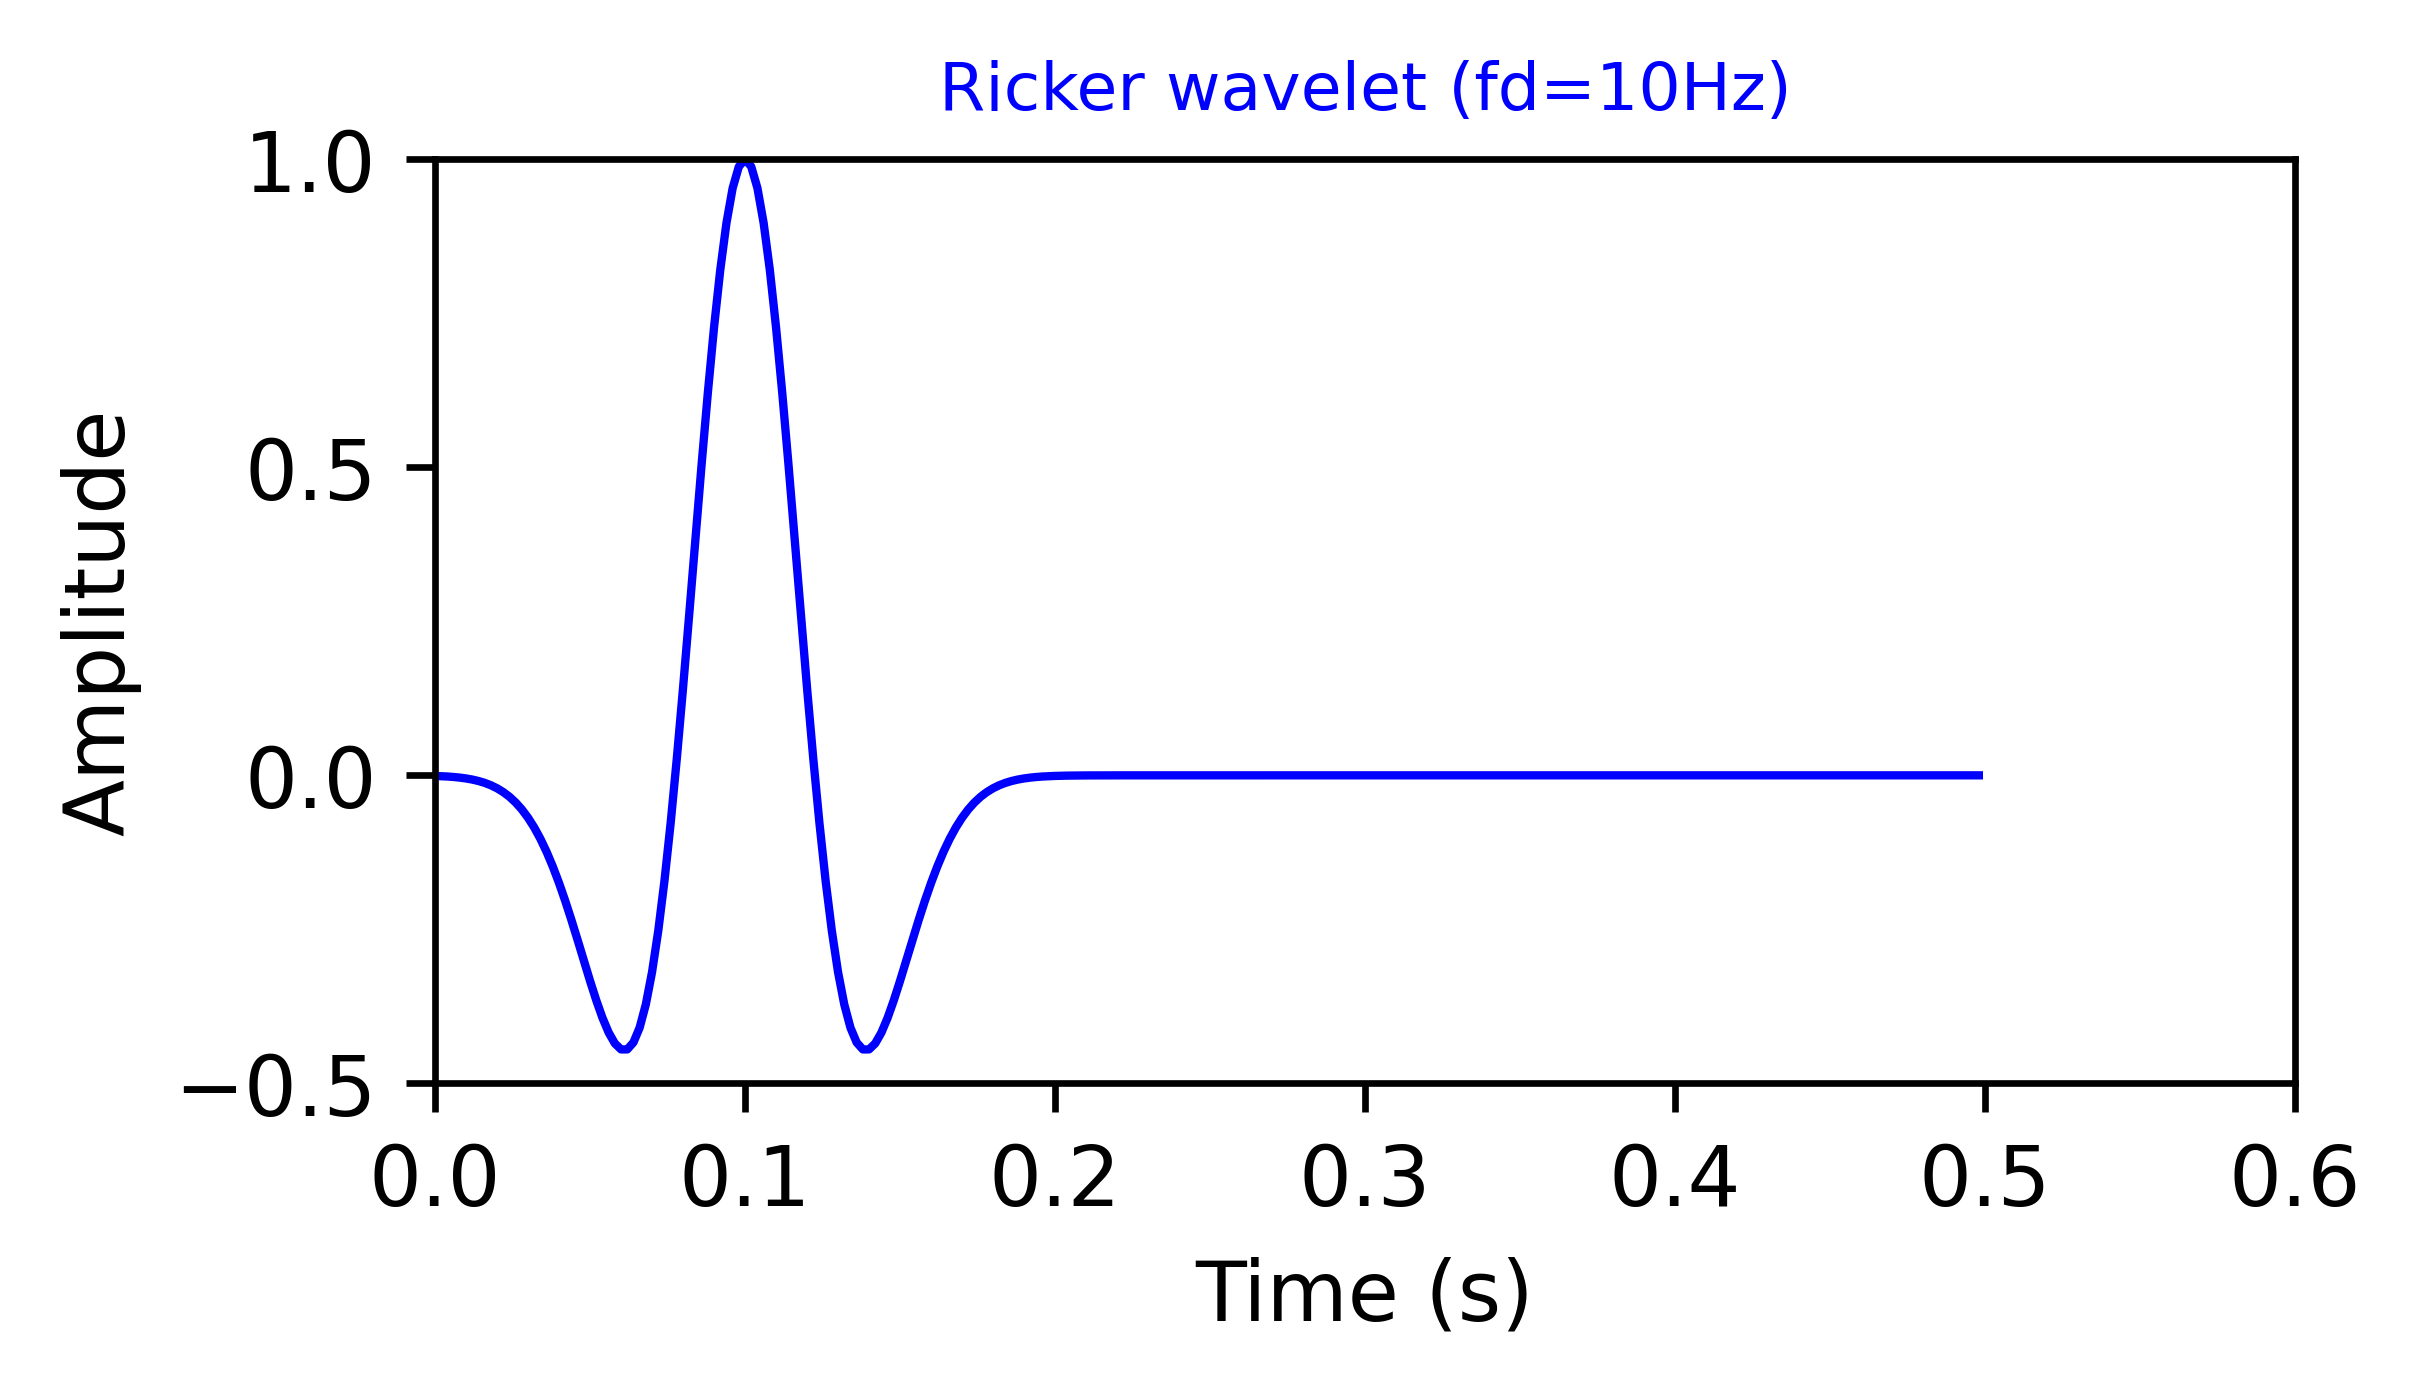

In [91]:
# define Ricker wavelet
pi = 3.141592653589793
t = np.linspace(0, (Nt-1)*dt, Nt)
                
Rs = np.zeros((Nt), dtype=float)  

for it in range(0,Nt):
    Rs[it]=(1.0-2.0*(pi*fm*(t[it]-0.1))**2)*math.exp(-1*(pi*fm*(t[it]-0.1))**2)
    
# Plot the Ricker wavelet
plt.figure(num=1,figsize=(4,2),dpi=600)
plt.plot(t,Rs,color='blue',linewidth=1.0,linestyle='-')

# set parameter for figure plot
plt.xlim(0,0.6)
plt.ylim(-0.5,1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
ax=plt.gca()
ax.set_title('Ricker wavelet (fd=10Hz)',fontsize=8,color='b')
plt.show()

In [92]:
v2t2_dx2 = v*v*dt*dt/dx/dx
v2t2_dz2 = v*v*dt*dt/dz/dz

x = np.linspace(0, (Nx-1)*dx, Nx) - (X/2)
z = np.linspace(0, (Nz-1)*dz, Nz) - (Z/2)

ixs = int(Xs/dx)
izs = int(Zs/dz)

# Define the array for waveform value at time step 2,1 and 0
U2 = np.zeros((Nz,Nx), dtype=float)
U1 = np.zeros((Nz,Nx), dtype=float)
U0 = np.zeros((Nz,Nx), dtype=float)

print(ixs)

for it in range(0,Nt):
    for ix in range(1,Nx-2):
        for iz in range(1,Nz-2):
            U2[iz,ix] = 2.0*U1[iz,ix] - U0[iz,ix] + v2t2_dx2 * (U1[iz,ix+1] - 2.0*U1[iz,ix] + U1[iz,ix-1]) \
            + v2t2_dz2 * (U1[iz+1,ix] - 2.0*U1[iz,ix] + U1[iz-1,ix])
        #if ix == ixs and iz == izs:
    U2[izs,ixs] = U2[izs,ixs] + Rs[it]
    for ix in range(0,Nx):
        for iz in range(0,Nz):
            U0[iz,ix] = U1[iz,ix]
            U1[iz,ix] = U2[iz,ix]
     
    


100


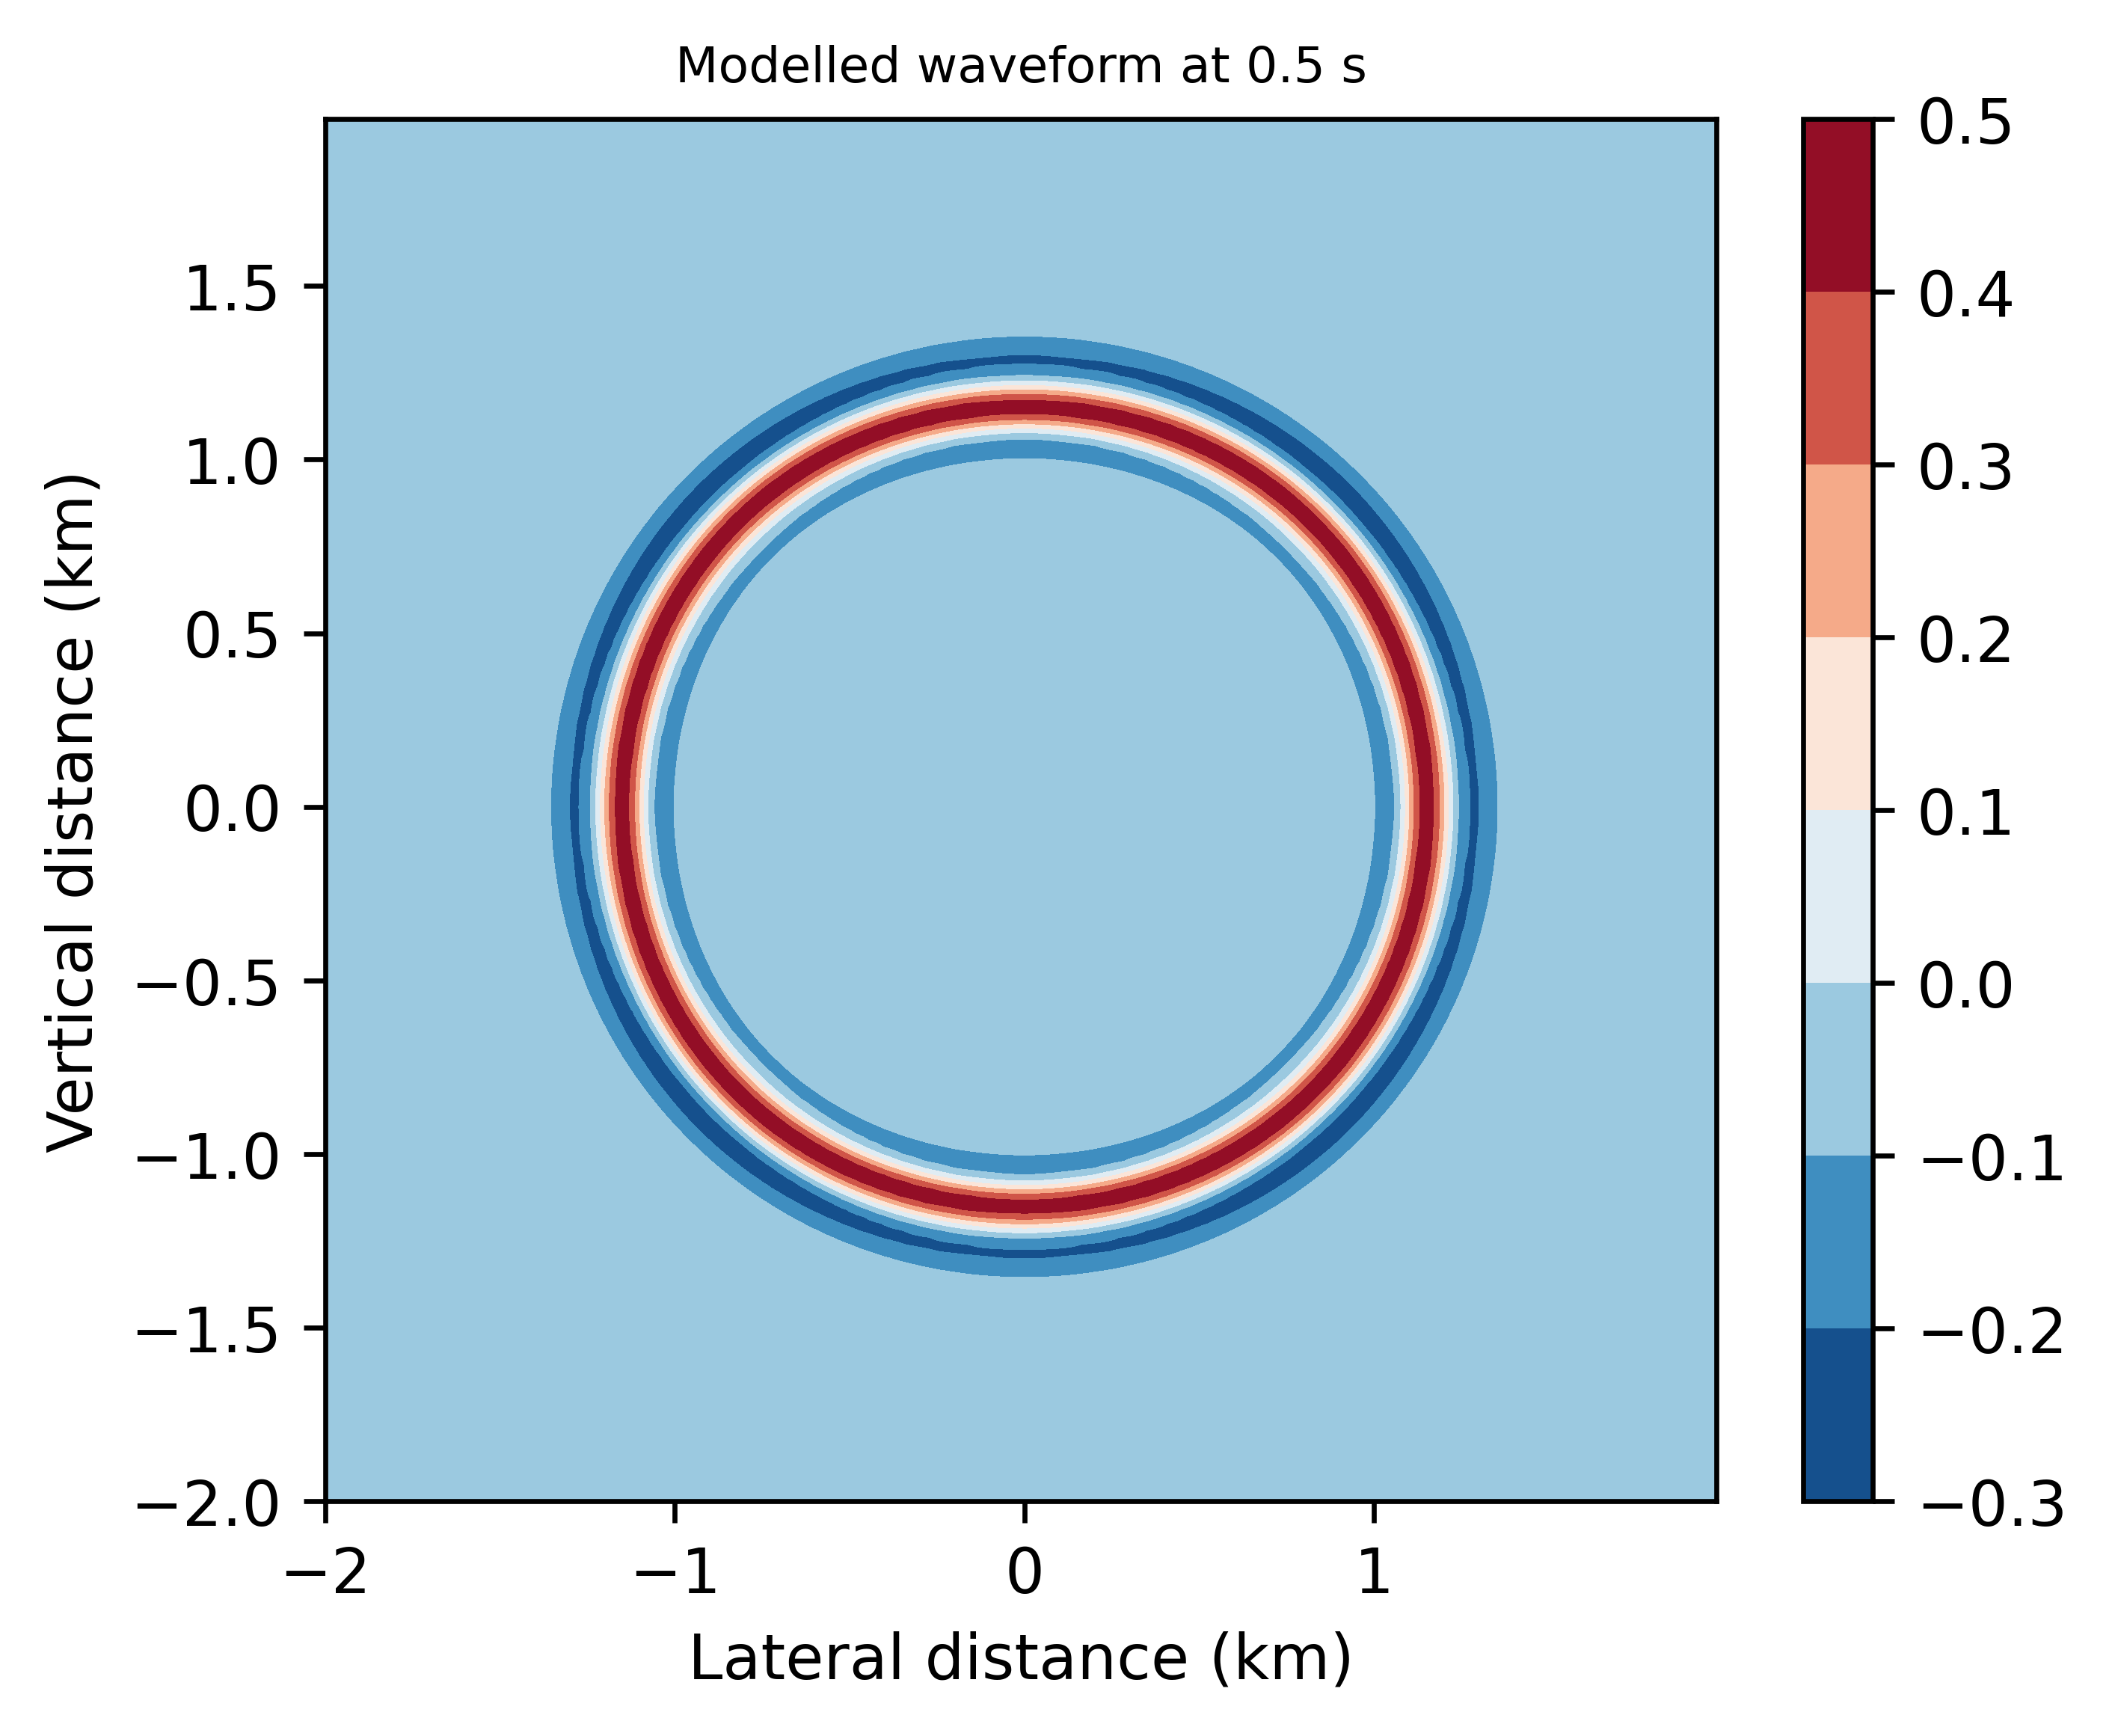

In [93]:
# Plot the waveform
plt.figure(num=1,figsize=(5,4),dpi=600)
cntr2 = plt.contourf(z/1000,x/1000,U2,cmap='RdBu_r')
#plt.xlim(-1*X/2/1000,X/2/1000)
#plt.ylim(-1*Z/2/1000,Z/2/1000)
plt.xlabel('Lateral distance (km)')
plt.ylabel('Vertical distance (km)')
ax=plt.gca()
title='Modelled waveform at ' + str(T) + ' s'
ax.set_title(title,fontsize=8,color='k')
plt.colorbar()
plt.show()
